# Student performance in exam exploratory data analysis

**dataset**

*   Kaggle

we will analyse the test scores  of students eg.reading,writing and math through different visualizations,
we will get to know how the data is represented and also the performance

Gender wise EDA is also performed in this project

In [4]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 3.2 MB/s 


In [5]:
import jovian


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [7]:
!pip install opendatasets --upgrade --quiet

In [8]:
import opendatasets as od

In [9]:
download_url="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: labheshmahajan
Your Kaggle Key: ··········


100%|██████████| 8.70k/8.70k [00:00<00:00, 3.33MB/s]

In [10]:
data=pd.read_csv("/content/students-performance-in-exams/StudentsPerformance.csv")

# Understanding the data

we will look how the data is, and to what aspect the data is in which form

In [11]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [12]:
data.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [13]:
data.shape

(1000, 8)

In [14]:
data.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [15]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Cleaning the data

In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
student=data.drop(["race/ethnicity","parental level of education"],axis=1)

In [20]:
student.head()

gender         lunch test preparation course  math score  reading score  \
0  female      standard                    none          72             72   
1  female      standard               completed          69             90   
2  female      standard                    none          90             95   
3    male  free/reduced                    none          47             57   
4    male      standard                    none          76             78   

   writing score  
0             74  
1             88  
2             93  
3             44  
4             75

# Relationship analysis

In [21]:
corelation=student.corr()

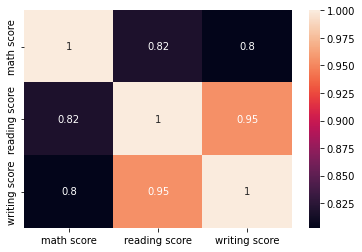

In [22]:
ax=sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True);

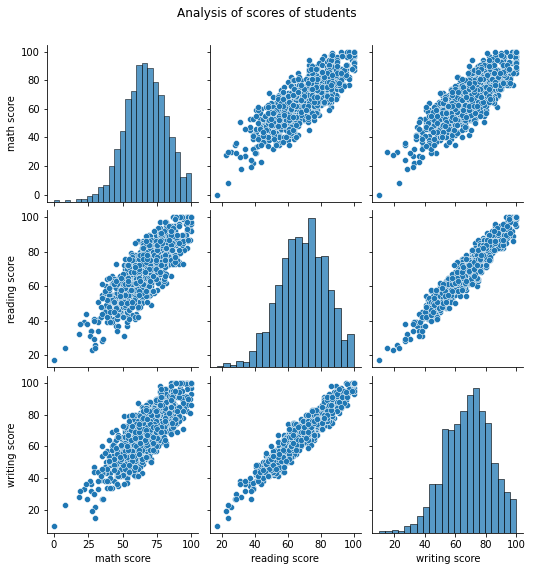

In [40]:
sns.pairplot(student);
plt.suptitle('Analysis of scores of students',y=1.05);


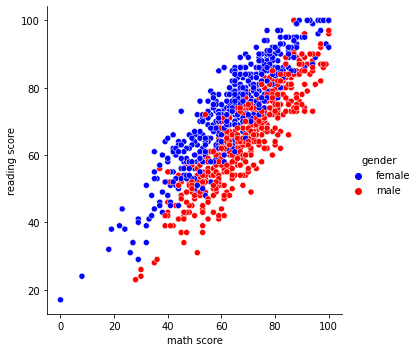

In [47]:
sns.relplot(x="math score",y="reading score",hue="gender",data=student,palette=["b","r"]);

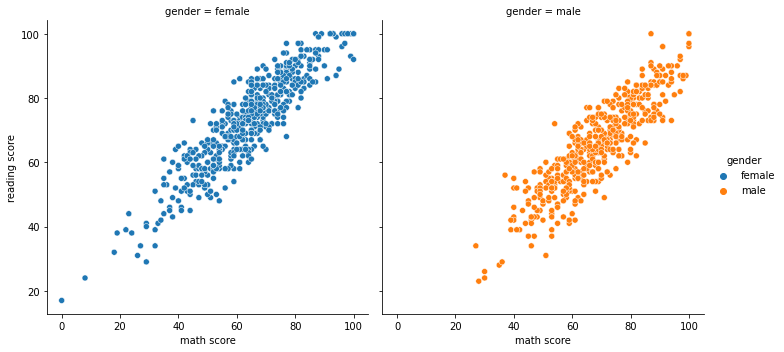

In [43]:
sns.relplot(x="math score",y="reading score",hue="gender",data=student,col="gender");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


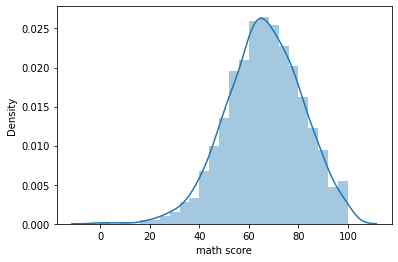

In [25]:
sns.distplot(student["math score"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


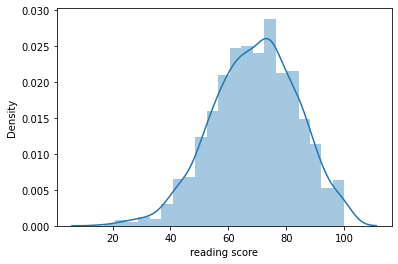

In [26]:
sns.distplot(student["reading score"]);

[Text(0.5, 1.0, 'The transition of scores')]

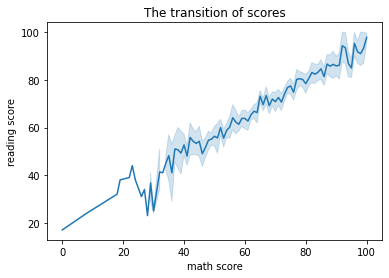

In [53]:
sns.lineplot(x='math score', y='reading score', data=student).set(
    title="The transition of scores")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


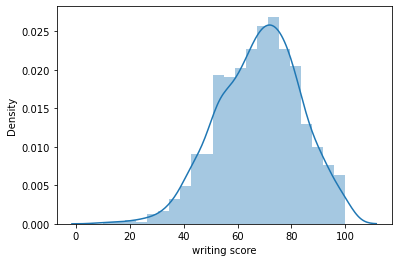

In [27]:
sns.distplot(student["writing score"]);

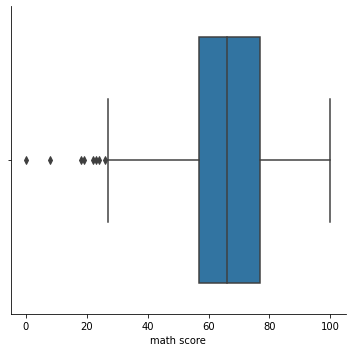

In [28]:
sns.catplot(x="math score",kind="box",data=student);

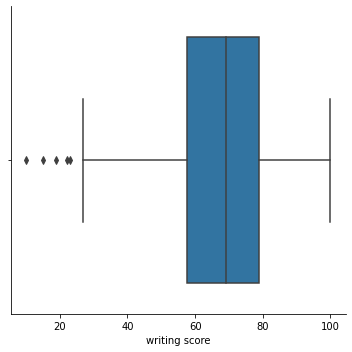

In [29]:
sns.catplot(x="writing score",kind="box",data=student);

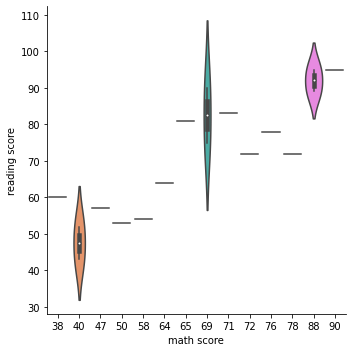

In [30]:
g = sns.catplot(x="math score", y="reading score",data=student[:17], kind="violin")

# Inferences and Conclusions
we have drawn many interesting inferences from the survey,here's summary of the few of them;


*   Based on the overall response of the survey respondents,we can infer that the survey is somewhat representative of the overall scoring areas of academic aspects
* Though  we can't get the overall performance of the student in the academic only based on the math,reading and writing  

*   The data doesn't gives us an insight of what the academic record is of,whether middle school,high school or college
*   The dataset made us realise that for data analysis math is very important especially statistics

*   Most children/student excel at math







# References and future work
There's a wealth of data or the information to be discovered for the student performance such as 

1.   student can't be judged only on the basis of academic,there's a certain role of extra curricular
2.   prepare an analysis focusing on diversity and identify the areas underrepresented

